<a href="https://colab.research.google.com/github/AmiAnurag/Feature-Engineering/blob/main/Handling_continous_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Will be using Titanic dataset for the analysis.
here we will see which feature engineering works better .

Feature engineering teachniques to be use:
1. Replacing nan by mean/median/mode
2. random Sample imputation
3. end of distribution imputation

Also for each case we will desing a technique to keep the information of missing value rows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSets/titatnic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.

Whether an observation is missing has nothing to do with the missing values, but it does have to do with the values of an individual’s observed variables. So, for example, if men are more likely to tell you their weight than women, weight is MAR.

Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study.

MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. You have to include some model for why the data are missing and what the likely values are.

“Missing Completely at Random” and “Missing at Random” are both considered ‘ignorable’ because we don’t have to include any information about the missing data itself when we deal with the missing data.


source: https://www.theanalysisfactor.com/missing-data-mechanism/

**For sake of exploration we will use a column which is already having all values**
The motive behind this is we will remove certain values at random from the column( hence mcar ) and then perform different featutre engineering teachnique to see which teaqnique responds the best.

Lets use the Fare column and remove 20% value and store it in fare exp column

In [ ]:
fare_train,fare_test=train_test_split(df.Fare,random_state=1)
fr_=dict(fare_test)
remove_row=np.array(list(fr_.keys()))
df['Fare_exp']=df.Fare
df.Fare_exp[remove_row]=math.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print("In fare column no of nan is ",df.Fare.isnull().sum()," and total data points are ",len(df.Fare))
print("In fare exp column no of nan is",df.Fare_exp.isnull().sum())

In fare column no of nan is  0  and total data points are  891
In fare exp column no of nan is 223


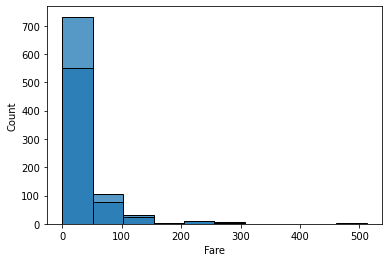

In [ ]:
sns.histplot(df,x=df.Fare,bins=10)
# plt.show()
sns.histplot(df,x=df.Fare_exp,bins=10)

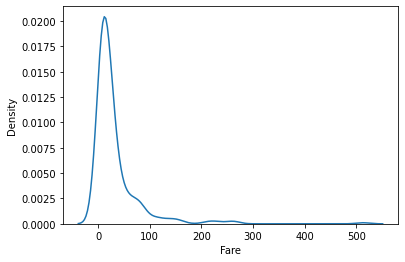

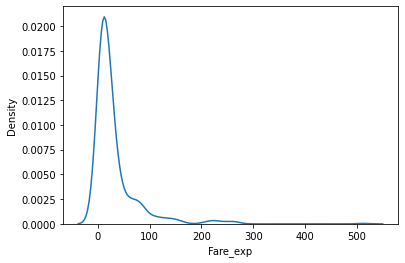

In [ ]:
sns.kdeplot(data=df,x='Fare')
plt.show()
sns.kdeplot(data=df,x='Fare_exp')

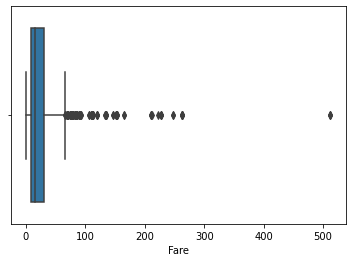

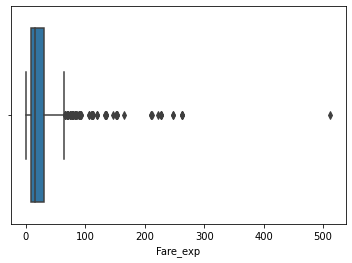

In [ ]:
sns.boxplot(data=df,x='Fare')
plt.show()
sns.boxplot(data=df,x='Fare_exp')

Understand a box plot - https://cdn.educba.com/academy/wp-content/uploads/2019/11/R-Boxplot-Labels-blank-output-3.png

In this fare column there is an problem of excess outliers . This could be solved using end distribution imputation.
we will observe it later on. Lets chek each imputation technique and find how close we resemble the actual Data

**Mean/Median/Mode Imputation**

In [ ]:
df["Fare_mean_Imp"]=df.Fare_exp
df["Fare_mean_Imp"].replace(np.nan,df.Fare_exp.mean(),inplace=True)
df["Fare_median_Imp"]=df.Fare_exp
df["Fare_median_Imp"].fillna(df.Fare_exp.median(),inplace=True)
df["Fare_mode_Imp"]=df.Fare_exp
df["Fare_mode_Imp"].fillna(df.Fare_exp.mode()[0],inplace=True)

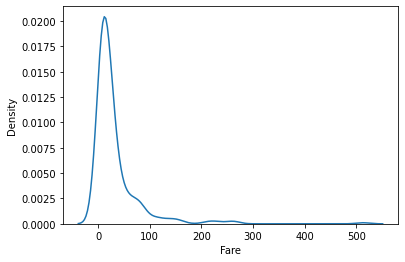

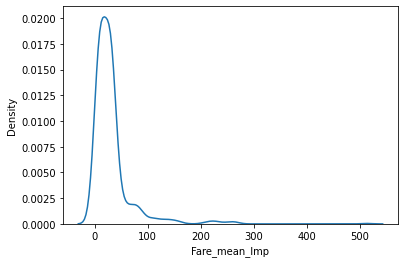

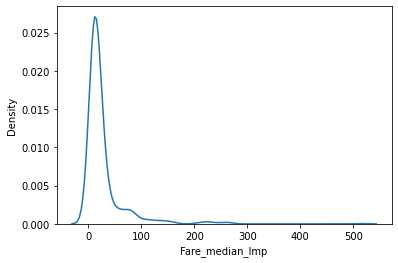

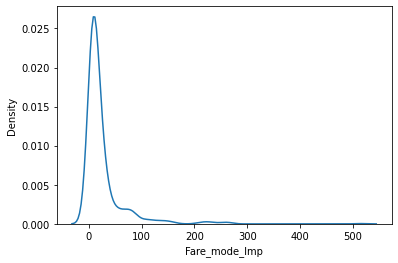

In [ ]:
sns.kdeplot(data=df,x='Fare')
plt.show()
sns.kdeplot(data=df,x='Fare_mean_Imp')
plt.show()
sns.kdeplot(data=df,x='Fare_median_Imp')
plt.show()
sns.kdeplot(data=df,x='Fare_mode_Imp')
plt.show()

In [ ]:
# lets see the mean absolute
print("Mean absolute error between actual data and mean imputation data",mean_absolute_error(df.Fare,df.Fare_mean_Imp))
print("Mean absolute error between actual data and median imputation data",mean_absolute_error(df.Fare,df.Fare_median_Imp))
print("Mean absolute error between actual data and mode imputation data",mean_absolute_error(df.Fare,df.Fare_mode_Imp))

Mean absolute error between actual data and mean imputation data 7.217472837321985
Mean absolute error between actual data and median imputation data 6.3232747474747475
Mean absolute error between actual data and mode imputation data 6.64554859708193


As can be observed from here for this data and this column the median imputaion is working best in comparision to mode and mean.

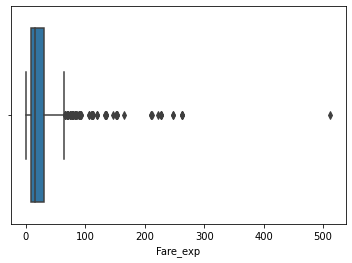

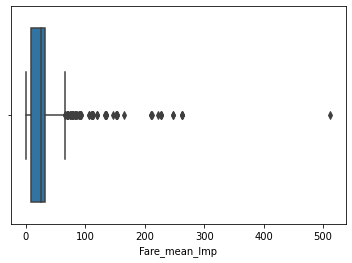

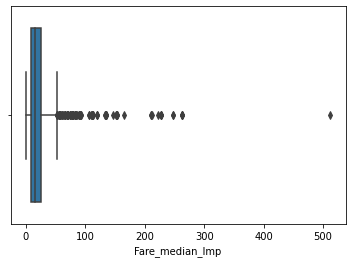

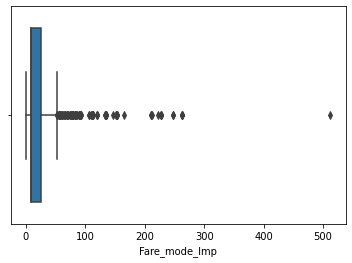

In [ ]:
sns.boxplot(data=df,x='Fare_exp')
plt.show()
sns.boxplot(data=df,x='Fare_mean_Imp')
plt.show()
sns.boxplot(data=df,x='Fare_median_Imp')
plt.show()
sns.boxplot(data=df,x='Fare_mode_Imp')
plt.show()

In [ ]:
l=pd.Series([1,2,3,math.nan])
l.mean()
#there fore the nan data is not consider as a point

2.0

Lets Move into Random sample imputation and end distribution distribution

In [ ]:
df['Fare_random']=df['Fare_exp']
random_sample=df.Fare_exp.dropna().sample(df.Fare_exp.isnull().sum(),random_state=10)
random_sample.index=df[df.Fare_exp.isnull()].index
df.loc[df.Fare_exp.isnull(),'Fare_random']=random_sample

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_exp,Fare_mean_Imp,Fare_median_Imp,Fare_mode_Imp,Fare_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,7.250000,7.2500,7.2500,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833,71.283300,71.2833,71.2833,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,31.571556,14.4542,8.0500,7.7958
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,31.571556,14.4542,8.0500,14.4583
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,8.050000,8.0500,8.0500,8.0500


In end distribution the last 0.1% data is used for filling the nan. This helps to shift the median and also take in the outliers.

In [ ]:
df['Fare_end']=df['Fare_exp']
df.Fare_end.fillna(df.Fare_exp.mean()+3*(df.Fare_exp.std()),inplace=True)

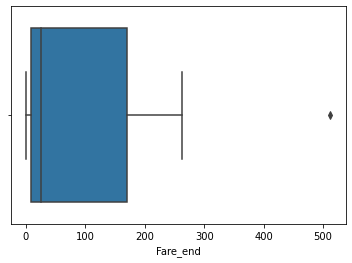

In [ ]:
sns.boxplot(data=df,x='Fare_end')

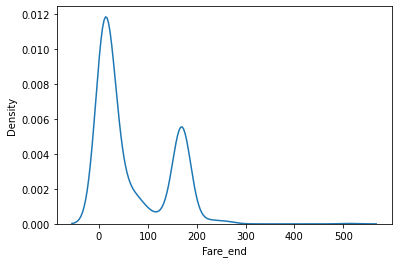

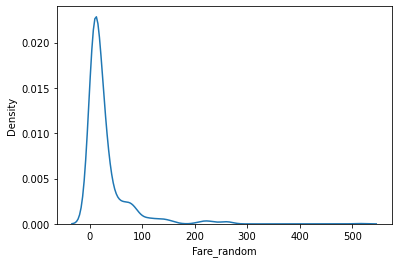

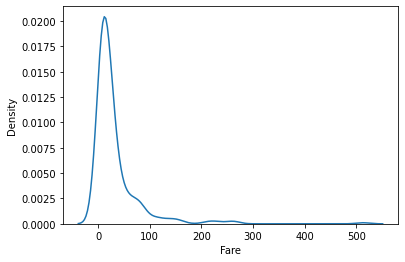

In [ ]:
sns.kdeplot(data=df,x='Fare_end')
plt.show()
sns.kdeplot(data=df,x='Fare_random')
plt.show()
sns.kdeplot(data=df,x='Fare')

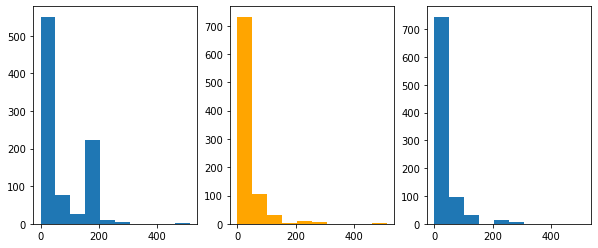

In [ ]:
fig=plt.figure()
fig.set_figwidth(10)
plt.subplot(131)
plt.hist(df.Fare_end)
plt.subplot(132)
plt.hist(df.Fare,color='orange')
plt.subplot(133)
plt.hist(df.Fare_random)
plt.show()

Advantage of Random Sample Imputation:

1. donot concentrates too much in a single data point unlike mean/median/mode/end distribution imputation.


In [ ]:
#lets checkout the mean absoulute error.
print("Mean absolute error of random imputation in fare-exp column is",mean_absolute_error(df.Fare,df.Fare_random))
print("Mean absolute error of end distribution imputation in fare-exp column is",mean_absolute_error(df.Fare,df.Fare_end))


Mean absolute error of random imputation in fare-exp column is 8.35776307519641
Mean absolute error of end distribution imputation in fare-exp column is 35.967453209254636


**Imputation by keeping the information of missing values**
1. make an extra column for the variable to analyze , in this cae fare column. Use the new column to sytore the nan value information by putting 1 in all those index where value of fare column is nan and rest all be 0.

2. if there are too many variables to analyze then this way is going to be a curse of dimensionality. To avoid this i have designed a technique in which irrespective of number of variables to analyze we just need to have one column only . This column will store entire information of all. What we will do is , we will fill the index of nan value of the column with mean of the variable being analyzed and whereever nan is present in n number of variables at same index we will add mean of all such columns and put it in the new columm same index.
eg.

Age=[2,    NaN,    4,    NaN]

Marks=[NaN,    5,    3,    NaN]

let say this two are columns of a dataset student. to store the information about nan values of both the column in a single column.

nan_information=[4,    3,    0,    7]

the first index contains the mean of marks column , second index contains  mean of age column, third index contains 0 as third index of both age and marks dont have nan value, 4th index contains sum of mean of age and marks as both have nan value at that position.

In [ ]:
# lets implement this concept

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_exp,Fare_mean_Imp,Fare_median_Imp,Fare_mode_Imp,Fare_random,Fare_end
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,668.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,31.571556,31.571556,27.287414,25.684567,30.217311,66.123105
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,46.017085,39.837036,40.521976,41.120805,43.556992,71.882423
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,7.895800,8.418750,8.418750,8.050000,7.895800,8.418750
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,14.454200,26.000000,14.454200,8.404200,14.000000,26.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.500000,31.571556,26.000000,26.000000,30.000000,169.622812
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,512.329200,512.329200,512.329200,512.329200,512.329200,512.329200


In [ ]:
# for the analysis i will use the age and Fare_exp column
df_ana=df[['PassengerId','Fare_exp','Age']].copy()
df_ana.head()

,PassengerId,Fare_exp,Age
0,1,7.2500,22.0
1,2,71.2833,38.0
2,3,NaN,26.0
3,4,NaN,35.0
4,5,8.0500,35.0


In [ ]:
nan_fare=np.where(df_ana.Fare_exp.isnull(),df_ana.Fare_exp.mean(),0)
nan_age=np.where(df_ana.Age.isnull(),df_ana.Age.mean(),0)
nan_data=nan_fare+nan_age
df_ana['Nan Information']=nan_data
df_ana[44:50]

,PassengerId,Fare_exp,Age,Nan Information
44,45,7.8792,19.0,0.000000
45,46,8.0500,NaN,29.699118
46,47,15.5000,NaN,29.699118
47,48,NaN,NaN,61.270673
48,49,21.6792,NaN,29.699118
49,50,NaN,18.0,31.571556
